# Zomato Data Analysis Project

### List of analysis we have to perform here in this project are

1) What type of restaurant do the majority of the customers order from?
2) How many votes has each type of restaurant received from customers?
3) What are the ratings that the majority of restaurants recived.
4) Zomato has observed that most couples order most of their food online. What is their average spending on each order?
5) Which mode (online or offline) has received the maximum ratings?
6) Which type of restautrant received more offline orders, so that Zomato can provide these customers with some good offers?


## Step 1- Importing Libraries

### 1. pandas is used for data manipulation and analysis.
### 2. numpy is used for numerical operations.
### 3. matplotlib.pyplot and seaborn are used for data visualization.
### 4. plotly for better data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Step 2 - Create the data frame

In [2]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/TheiScale/YouTube-Video-Notes/refs/heads/main/Zomato_Python_Project/Zomato%20data%20.csv")

In [3]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### What type of restaurant do the majority of the customers order from?

#### But first we need to clean the data..

#### convert the data type of column (rate)

In [5]:
def handleRate(value):
    value = str(value).split('/') # removig /5 from the column.
    value = value[0];
    return float(value)
dataframe['rate']= dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### checking for missing nad null values in the data

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Showing Type of Restaurant:

In [8]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

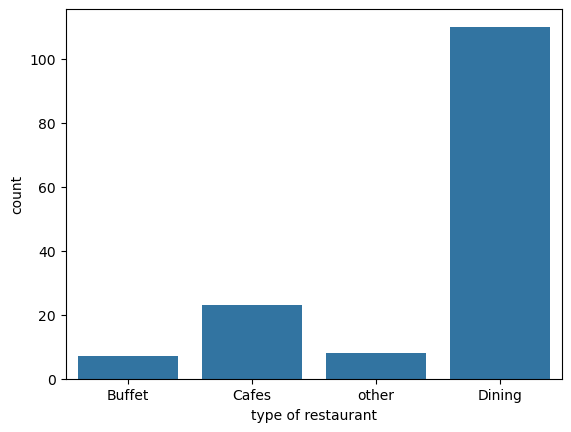

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

### Conclusion: majority of the restaurants are falls in dining catagory.

# Question 2: How many votes has each type of restaurant received from customers?

we are going to create line graph using 2 columns ,, votes and listed_in(type)

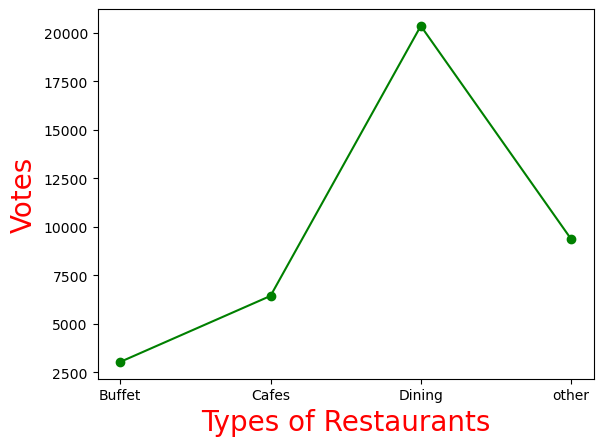

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c = "green", marker = 'o')
plt.xlabel('Types of Restaurants', c = 'red', size= 20)
plt.ylabel('Votes', c = 'red', size = 20)
plt.show()

## Conclusion: Dining Restaurants has received maximum votes

# Question 3: What are the ratings that the majority of restaurants recived?


In [12]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


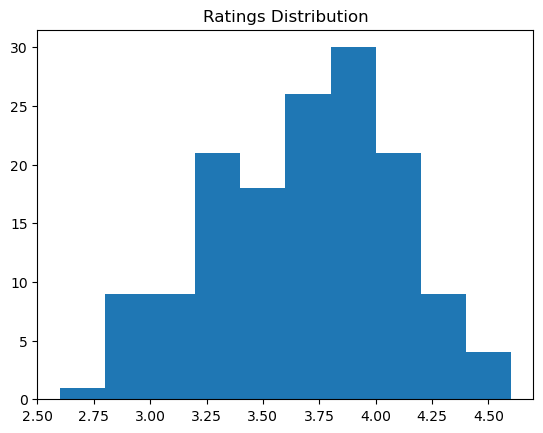

In [14]:
plt.hist(dataframe['rate'], bins=10)
plt.title('Ratings Distribution')
plt.show()

## Conclusion: The majority restaurants received from 3.5 to 4.00

# Question:4 Zomato has observed that most couples order most of their food online. What is their average spending on each order?

In [16]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

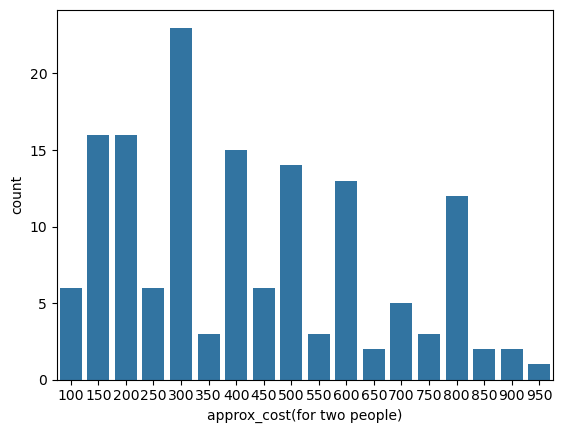

In [19]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

## Conclusion: As we can see the graph the majority of couples spend 300 rupees on dining in restaurants

# Question 5: Which mode (online or offline) has received the maximum ratings?


In [20]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

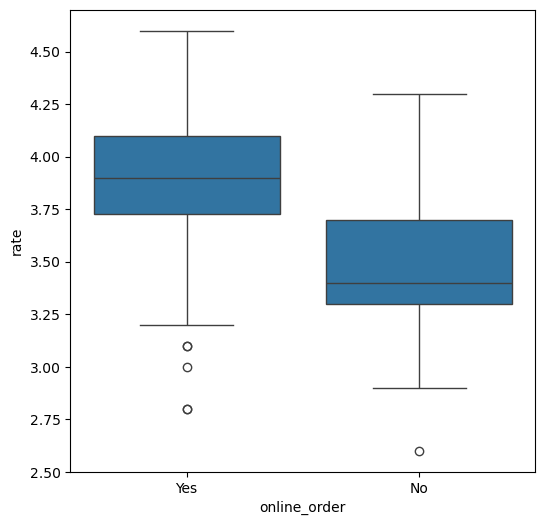

In [22]:
# creating box plot here
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

## Conclusion: Offline orders recieve lower ratings in comparison to online orders.

# Question 6: Which type of restautrant received more offline orders, so that Zomato can provide these customers with some good offers? 

#### creating heat plot here.

In [23]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


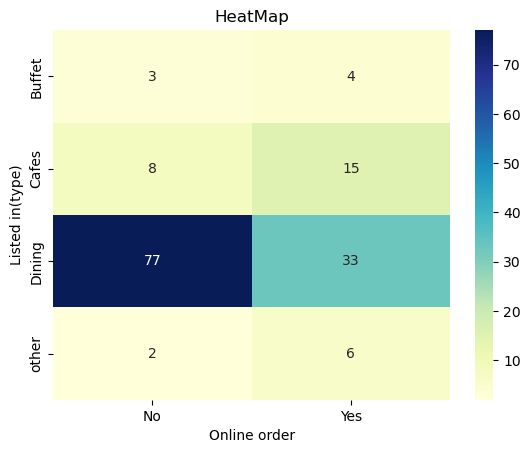

In [24]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot=True, cmap = 'YlGnBu', fmt='d')
plt.title('HeatMap')
plt.xlabel('Online order')
plt.ylabel('Listed in(type)')
plt.show()

## Conclusion: Dining Restaurants primirily accept offline orderwhereas cafes primarily receive online orders. This suggest that clients prefer orders in person at the restaurants, but prefers online orders in cafe.